

# Image Processing Python Lab - COLOR & HISTOGRAMS
<hr style="height:1px; border:none; background-color:#00A6D6;">

Here is a guide to the different parts of the lab: <br>
    <span style="font-size: 20px">❓</span> - This symbol means that there is a question related to it. Your answer to the specified question should go in the yellow box below it. <br>
    <span style="font-size: 20px">ℹ️</span> - This symbol means that there is some additional or important information relating to the lab or specific exercise. <br>
    <span style="font-size: 20px">💬</span> - This symbol means that the following text is part of the overarching story you follow, giving you more context into what you are doing and how it is applicable in real life situations.
   

__Objectives__
- Implement histogram equalization
- Determine when to use histogram equalisation
- Determine the difference between color spaces and convert from one to the other
- Segment parts of the image based on color

<hr>

## Convert to PDF

<div style="background-color:#0DA006; padding:10px; color: white; border-radius: 10px" >
First try to convert to PDF via LaTeX:
<ul>
  <li>First you need to make sure that you have LaTeX installed (this goes for whatever operating system you are using). You can go to https://www.latex-project.org/get/ and get the proper distribution for your operating system.</li>
  <li>After doing that, you can go to where xelatex.exe is found (this should be in AppData\Local\Programs\MiKTeX\miktex\bin\x64\xelatex.exe if you are getting MiKTeXfor Windows, or the equivalent on other any other OS). If you are having a hard time finding the folder, you can use "where xelatex" as a command for Windows, the find command for Mac and Linux or just use the file explorer.</li>
  <li>After making sure you have xelatex setup, you can try the "PDF via LaTeX" in the "File" -> "Download as" menu in jupyter notebook</li>
</ul>
If the above option does not work you can follow these instructions:
<ul>
  <li>Go into "File" -> "Print Preview"</li>
  <li>Make sure the generated PDF is readable then you can use Ctrl+P or Command+P (on MacOS) to Print Page, where you select to save to PDF rather than printing (each system has a different interface).</li>
  <li>Before submitting make sure that all answers/code/plots are clearly visible.</li>
</ul>
If none of the methods work, contact a TA during labs and ask about further steps.
</div>

<div style="background-color:#00A6D6; padding:10px; color: white; border-radius: 10px" >
<p style="font-size:25px">💬</p>
You are working as a CSI Image Processing expert in Delft. One night while your neighbours are away you hear a window breaking and shortly after you see a van storm off.
Not long after you see your colleagues arrive at the scene and after some investigation they brief you in that there has been a roberry at the house two doors down. There seems to be some survailance footage available from a nearby street camera but its quality is questionable at best. Lead detective O'Hara has requested you at the precinct immediately as after contacting the house owners assistant officer Reily was informed that some very valuable jewels have been stolen from the property. Begrudgingly you change into your working clothes, grab your morning coffee and head to the office.

<hr style="height:1px; border:none; background-color:#FFFFFF;"><hr>

After arriving at your desk you turn on your 3 working monitors and slap number 4 to make the image there stable as it has been giving you some troubles lately. In front of you is the footage from the camera in the neighbourhood. Your first task now is to "enhance" the image and make objects in it more visible as with the current quality the detectives can barely distinguish anything.

Fortunately for you your assistant Jeeves was already at the office sorting previous case files and he managed to sift through the materials before you arrvied. He has selected several frames which he thinks might be useful to analyse and improve. 
(Remember that you are the expert here and if you think that the frames selected by Jeeves are not suitable feel free to select your own from the video and work on them)
</div>

<div style="padding:10px" >
<span style="font-size: 20px">ℹ️</span>
<i>
In the folder of the Lab Notebook you are also given several folders with images to accompany the excerises you're about to start. In most of the execises the path to the image is already specified and you only need to add the name of the file you want to work with. 
Additionally in some code cells you'll be given code that you can use as is. Please do not change the given functions signature (that includes the names, inputs and return values).

You can read the image(s) into the notebook using the command `plt.imread("path/to/file.jpg")`
<i>

<div style="padding:10px" >
<span style="font-size: 20px">ℹ️</span>
<i>
 Some code cells and excercises have some code already provided for you to use. The steps for the exceises you need to do in the code cells are marked with comments. Your code should go under the corresponding comment line describing the specific step. You can treat those lines as "TODO" items.
</i>

In [3]:
##########################################################################################
# Importing various modules into PYTHON. These will be used throughout this Jupyter Notebook
##########################################################################################

# If you're having problems with the imports uncomment the following lines to install the libraries
# !pip install opencv-python
# !pip install numpy
# !pip install pickle-mixin
# !pip install matplotlib
# !pip install imutils

# import matplotlib for data visualisation
import matplotlib.pyplot as plt

# import NumPy for better matrix support
import numpy as np

# import Pickle for data serialisation
import pickle as pkl

# import cv2 and imutils for image processing functionality
import cv2
import imutils



In [4]:
# Some plotting functions to make your work easier

# Displays a given RGB image using matplotlib.pyplot
def plotImage(img, title, cmapType=None):
    # Display image
    if (cmapType):
        plt.imshow(img, cmap=cmapType, vmin=0, vmax=255)
    else:
        plt.imshow(img, vmin=0, vmax=255)
    plt.title(title)
    plt.show()

# ! Use [img] that has only one channel !
# Displays the given image and its histogram below it
def plotImageAndHistogram(img, title, cmapType=None):
    # Display image
    if (cmapType):
        plt.imshow(img, cmap=cmapType, vmin=0, vmax=255)
    else:
        plt.imshow(img, vmin=0, vmax=255)
    plt.title(title)
    plt.show()
    # Display histogram
    plt.hist(img.flatten(), bins=256)
    plt.show()

In [5]:
# Specifying the path to the images
path = "resources/lab_01/other/"

# Read and show the image that you have chosen

# Note: Reading and displaying an image using cv2 is also possible. 
# However within the jupyter notebook it causes problems

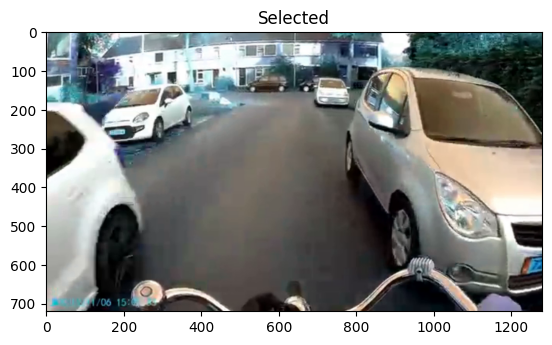

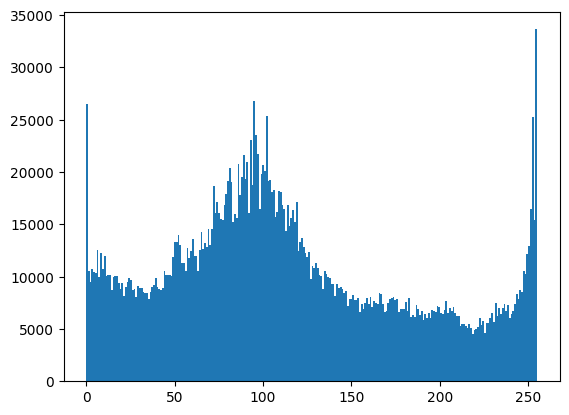

In [11]:
##########################################################################################
# Boilerplate code for selecting your own frame from the video
##########################################################################################

cap = cv2.VideoCapture(path + "dutch_plates_cropped.mp4")

# Choose a frame to work on
frameN = 42

for i in range(0, frameN) :
    
    # Read the video frame by frame
    ret, frame = cap.read()
    # if we have no more frames end the loop
    if not ret:
        break

# When everything done, release the capture
cap.release()
# cv2.destroyAllWindows()

# Show your frame
plotImageAndHistogram(frame, "Selected")

## PYTHON HANDS-ON Assignment I.1: Enhance the contrast of the image

**Completion requirements for this assignment:**
- [ ] Implement the 4 ways of contrast improvement
- [ ] Show and explain the pros and cons of histogram equalization

<div style="background-color:#c2eafa"> 

The image you're given of the robbery seems like it could use some contrast enhancements. You cannot clearly see how many people are being taped or what kind of car is on the tape. To fix this you're tasked to try multiple different contrast enhancement techniques to determine which works best in making the image more readable. Work with the 'robbery_low_contrast.jpg' in 'resources/lab_01/exercise_01' directory.    
    
    
For this first part you'll need to display a chosen image and its histogram

<div style="background-color:#c2eafa"> 

<span style="font-size: 20px">ℹ️</span> You can use read the input image also using `cv2.imread('myimage.jpg')` - Notice that OpenCV reads the images as **BRG instead of RGB**
    
    
<span style="font-size: 20px">ℹ️</span> Make sure that images are always copied to `np.arrays` variable type before doing any mathimatical operations on the images.


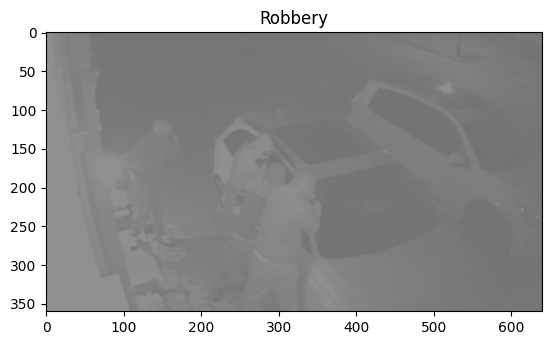

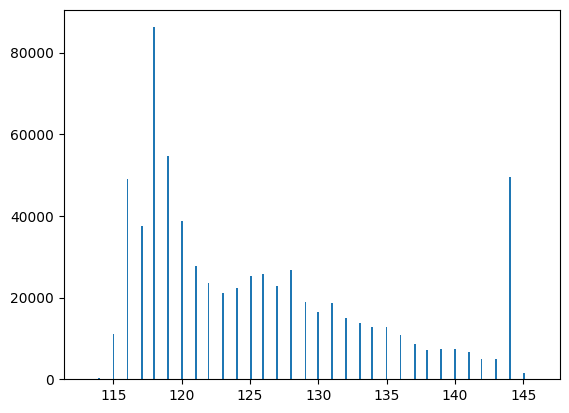

(360, 640, 3)

In [25]:
# Load image
path = "resources/lab_01/exercise_01/"

# Display image and histogram
image = cv2.imread(path + "robbery_low_contrast.jpg")
plotImageAndHistogram(image, "Robbery")


<div style="background-color:#c2eafa"> 
    
### I.1.1 Set the global variables Contrast Improvement - Pixel Multiplication
Apply the point operation of contrast enchancement by multiplying pixel values by a certain contrast factor. Since we're aiming to increace the contrast think about if the contrast factor should be >1, <1 or =1. 

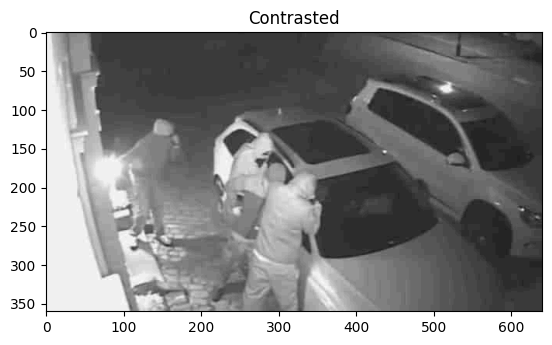

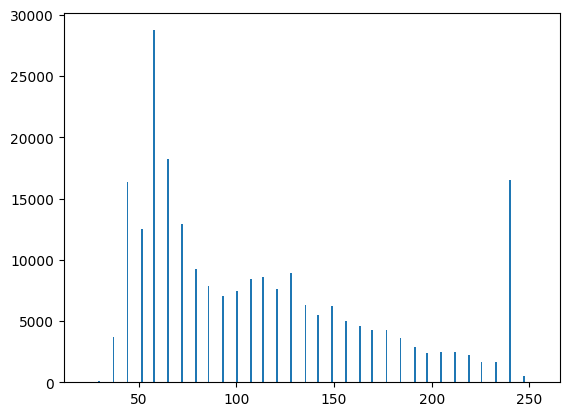

In [95]:
# Define a function to do the point operation
def contrastImprovementPixelMultiplication(img, contrastFactor, title = None):    
    # Define point operation formula
    
    # Do point operation on pixels
    image = np.clip(img * contrastFactor, 0, 255).astype(np.uint8)
    plotImageAndHistogram(image, title, 'gray')
    return image

# Load image
path = "resources/lab_01/exercise_01/"

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

mean = np.mean(gray)
# Change contrast using point operation
cont_gray = contrastImprovementPixelMultiplication(gray, 7, "Contrasted")
# Plot the image and histogram


#1 doesnt change the img
# smaller than 1 will make it more 



<div style="background-color:#c2eafa"> 
    
### I.1.2 Contrast Improvement - Formula

Apply contrast improvement using this formula, `(I(x,y) - 127) * contrast + 127` <br>

<div style="background-color:#c2eafa"> 
    

<div style="padding:10px" >
<span style="font-size: 20px">ℹ️</span>
<i>
Remember to work with integers when applying the formula

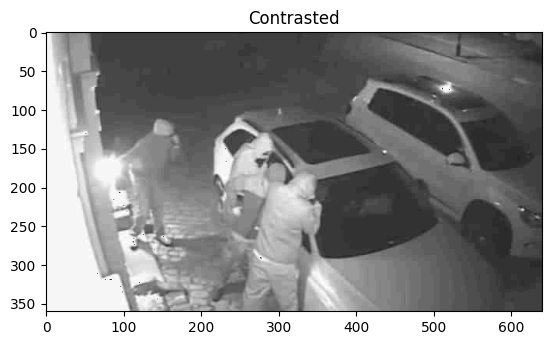

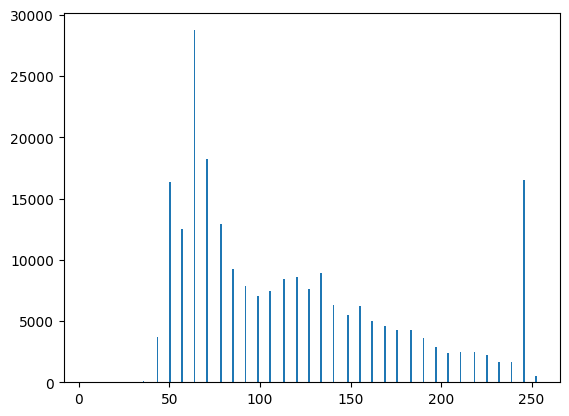

In [ ]:
# Define a function to do the point operation
def contrastImprovementFormula(img, contrastFactor, title = None):    
    # Define point operation formula

    # Do point operation on pixels
    image2 = ((img - 127) * contrastFactor) + 127
    plotImageAndHistogram(image2, title, 'gray')
    return image2

# Load image
path = "resources/lab_01/exercise_01/"



gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

mean = np.mean(gray)

cont_gray = contrastImprovementFormula(gray, 1, "Contrasted")

# Convert to grayscale

# Change contrast using formula

# Plot the image and histogram

<div style="background-color:#c2eafa"> 
    
### I.1.3 Contrast Improvement - Contrast Stretching
Apply contrast stretching in practice using the linear transform function
    `f (i) = a(i + b)` . Make sure to fins appropiate values to `a` and `b`

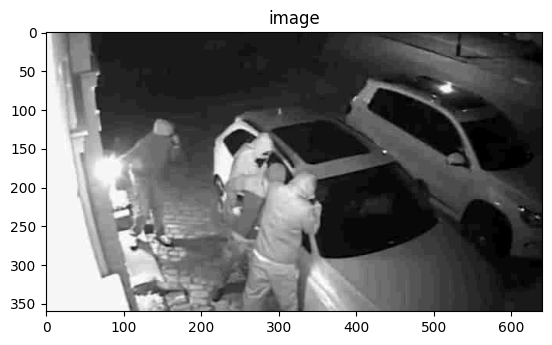

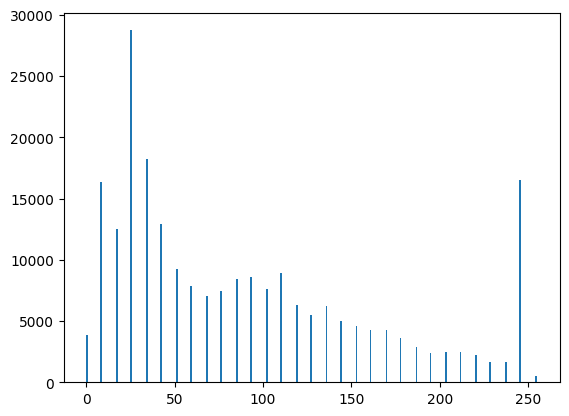

In [107]:
def contrastImprovementContrastStretching(img, a, b, title = None):    
    # Define operation formula
    img = a * (img + b)
    # Do point operation on pixels
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img

# Load image
path = "resources/lab_01/exercise_01/"

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply contrast stretching function
a = 255/30
b = -115
image2 = contrastImprovementContrastStretching(gray, a, b, "gray")
plotImageAndHistogram(image2, "image", "gray")

# Plot the image and histogram


<div style="background-color:#c2eafa"> 
    
### I.1.4 Contrast Improvement - Histogram Equalization
Now you'll need to apply histogram equalization. Parts of the code have already been provided as well as some function suggestions. Feel free to refer to the numpy documentation (https://numpy.org/doc/) for more clarification on what each function does.

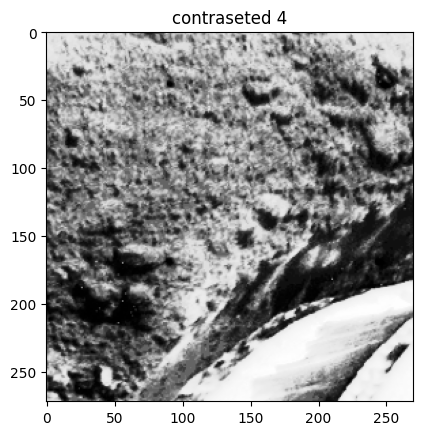

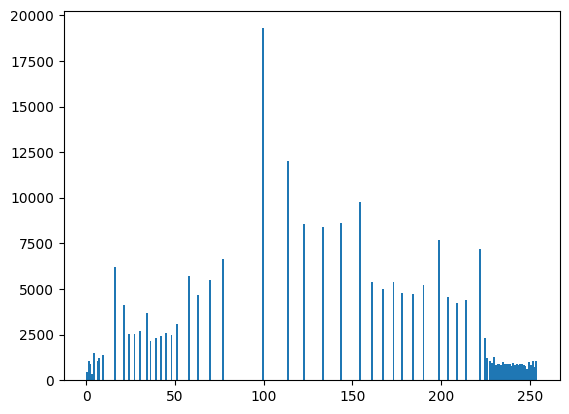

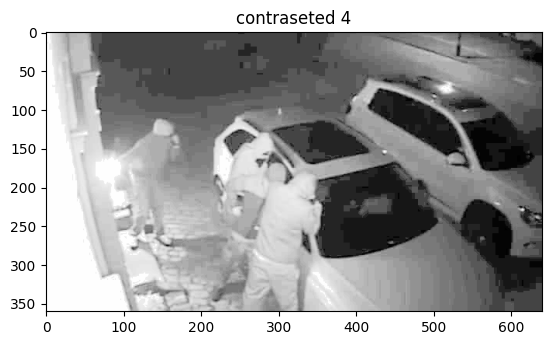

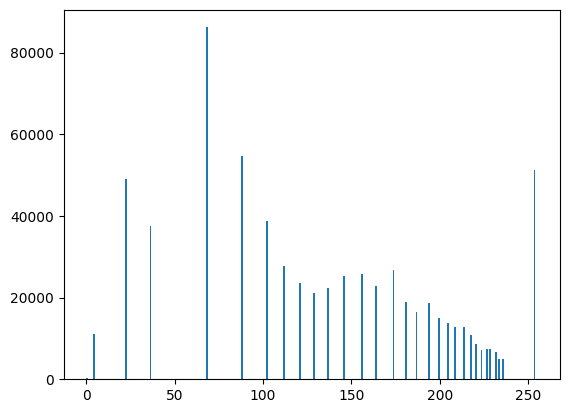

In [127]:
def contrastImprovementHistogramEqualization(img, title = None):
    # Create your own histogram array (a suggested function is np.bincount())
    
    hist,bins = np.histogram(img.flatten(),256,[0,255])
    

    hist = hist / len(img.flatten())
    # Convert to cumulative sum histogram
    cumulativeHistogramArray = hist.cumsum()

    # Creating a mapping lookup table
    transformMap = np.floor(255 * cumulativeHistogramArray).astype(np.uint8)

    # Flatten image into 1D list
    imgflat = img.flatten()
    # Transform pixel values to equalize
    imgflat = [transformMap[x] for x in imgflat]
    # Write back into an image
    img = np.reshape(imgflat, img.shape)
    return img
    
# Load image
photo = cv2.imread(path + "slidePic.png")

path = "resources/lab_01/exercise_01/"
i = contrastImprovementHistogramEqualization(photo)
# Plot original image and histogram
plotImageAndHistogram(i, "contraseted 4", "gray")
# Apply histogram equalization function


path = "resources/lab_01/exercise_01/"
i = contrastImprovementHistogramEqualization(image)
# Plot original image and histogram
plotImageAndHistogram(i, "contraseted 4", "gray")


# Plot the image and histogram

###  Questions section

<div style="background-color:#c2eafa"> 
<span style="font-size: 20px">❓</span> (type your answer in the yellow field below)

<i>
Showcase the pros and cons of histogram equalisation:

- Provide 1 example images where it would be a preferred technique and explain why.
- Provide 1 image where you would use a different contrast manipulation method and explain why histogram equalisation is worse
</i>

<div style="background-color:#f1be3e; padding:10px; color: white; border-radius: 10px" >

**Type your answer here.**
1) frist image is an example where it works well. The reason it works well is because we have a lot of color set together and we add diffence and contrast between smaller changes. 

2) Second image works less well because we have more variaty in the color, the distribution is more spead out, meaning that we dont add much new information when equalizing.

</div>

## PYTHON HANDS-ON Assignment I.2: Color analysis and manipulation

<div style="background-color:#00A6D6; padding:10px; color: white; border-radius: 10px" >
<p style="font-size:25px">💬</p>
A college police officer, Barry Steel, while cycling noticed a car that roughly matches the description given of the one from the robbery. Unfortunately the car passed him by quite quickly and he couldn't get a good look at it. Fortunately, however, all police bikes are equipped with a camera and so officer Steel decied to come to you with the footage and images hoping you'd be able to figure something out.<br>
<br>
The police station has an old image processing program that takes in the images of cropped plates and tries to find matches in the database. They used to do this task of cropping manually. But since you joined the team, they asked you if you could build a system that does the cropping automatically.
</div>

 
**Completion requirements for this assignment:**
- [ ] Convert images into different color spaces
- [ ] Segment a part of an image based on its color/hue
- [ ] Crop out the licence plate based on the previous segmentation

One possible way to do this is using color segmentation since the Dutch plates usually have a distinct yellow color. To build such a system you know you'll need the following steps:
- View the image in different color space to see how the colors are distributed over the channels & to determine which color space is the more feasible to work with.
- View the histogram of each color space channel to instigate how the colors are distributed over each channel
- Segment the plates in the image based on the color. 
- Crop the image after segmentation by determining the corner location of the plate.

<div style="background-color:#c2eafa"> 

    
 
### I.2.1 Converting to different color spaces and channels
Convert an image to different color spaces and work with different color channels.
Convert the image into the following color spaces:
- RGB
- HSI
- Grayscale

 and determine the yellow color in each space (if possible) by visually inspecting the histograms of the channels: 
- Hue
- Saturation
- Intensity

Finally, write the most appropriate color range you determined (and specify in which color space it is)

<div style="background-color:#c2eafa"> 
    
<div style="padding:10px" >
<span style="font-size: 20px">ℹ️</span>
<i>
You can read about some mathematical features of colors in <a href=https://staff.fnwi.uva.nl/th.gevers/pub/CIP06.pdf>this book</a>(https://staff.fnwi.uva.nl/th.gevers/pub/CIP06.pdf) on page 5




<span style="font-size: 20px">ℹ️</span> You can use read the input image also using `cv2.imread('myimage.jpg')` - Notice that OpenCV reads the images as **BRG instead of RGB**
    
<span style="font-size: 20px">ℹ️</span> To Convert the BRG image to RGB, this function can be used `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`

<span style="font-size: 20px">ℹ️</span> To Convert the RGB image to HSV, this function can be used `cv2.cvtColor(img, cv2.COLOR_RGB2HSV)`

Make sure to set up matplotlib.pyplot if you're displaying an image that isn't in RGB

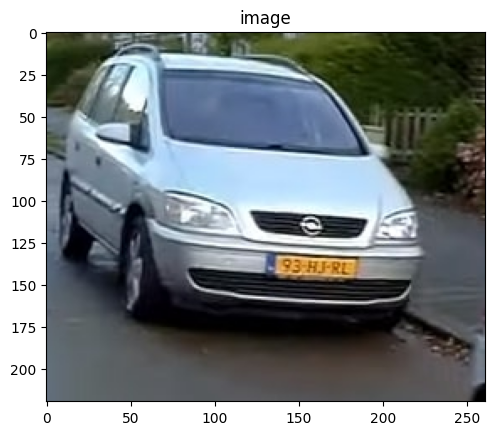

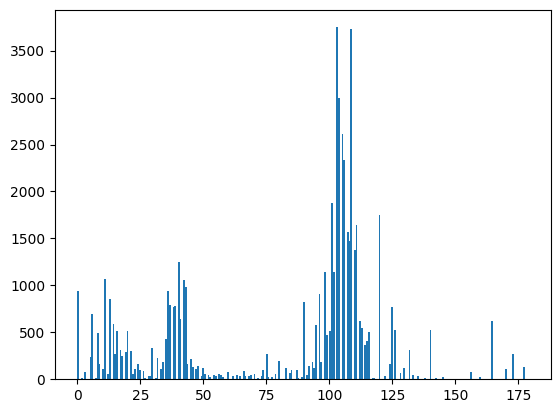

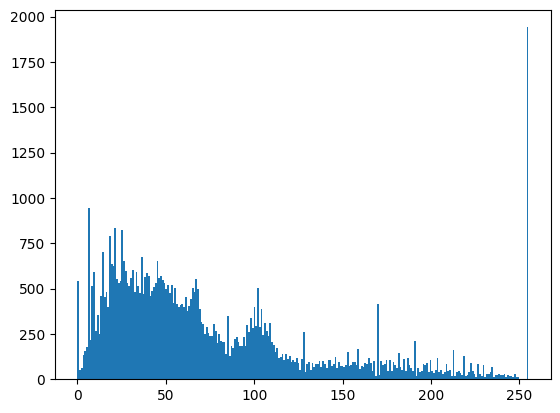

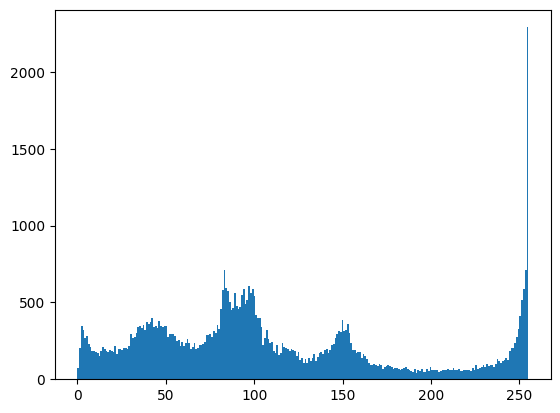

In [222]:
# Load image
path = "resources/lab_01/exercise_02/"
image = cv2.imread(path + "single_car_plate.jpg")
# Display image
# Convert to RGB (if it isn't)
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plotImage(imageRGB, "image")
# Convert to HSV/HSI
imageHSV = cv2.cvtColor(imageRGB, cv2.COLOR_RGB2HSV)

# Convert to grayscale
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Isolate Hue channel and plot its histogram
plt.hist(imageHSV[:,:,0].flatten(), bins=256)
plt.show()
# Isolate Saturation channel and plot its histogram
plt.hist(imageHSV[:,:,1].flatten(), bins=256)
plt.show()

# Isolate Intensity channel and plot its histogram
plt.hist(imageHSV[:,:,2].flatten(), bins=256)
plt.show()



<div style="background-color:#c2eafa"> 
    
### I.2.2 Segmenting based on color
In your line of work you know that the HSI space is very well suited to do the segmentation, specifically the hue channel.  You can use `cv2.inRange()` to do the color extraction. This function acts like a band-pass filter in the way that is only keeps the pixels in the image with color values falling outside the chosen the range to zeros.
Try different ranges to best segment the plate.

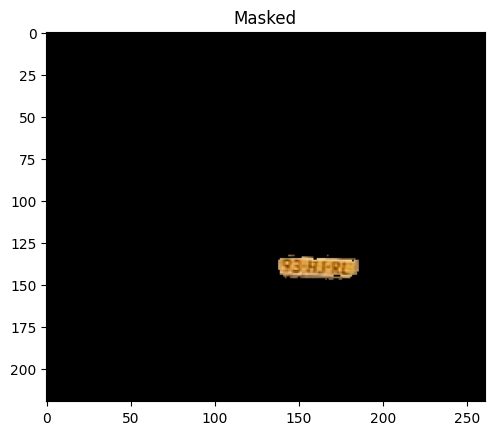

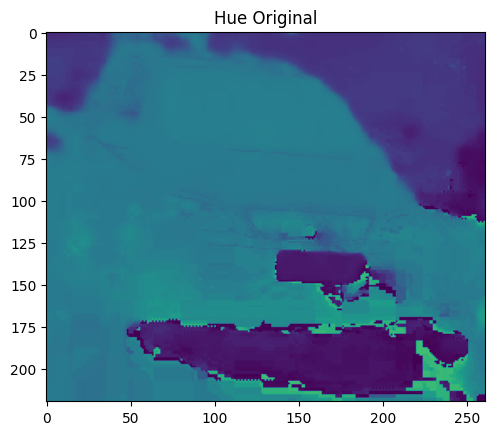

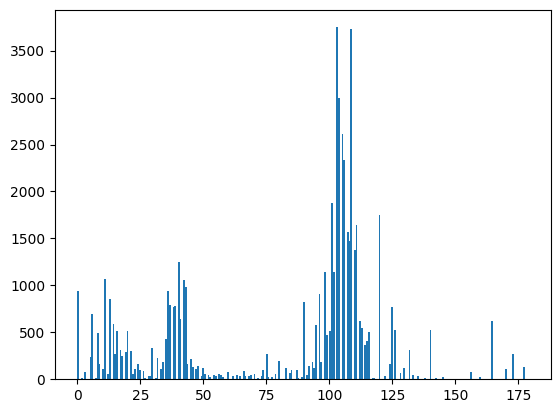

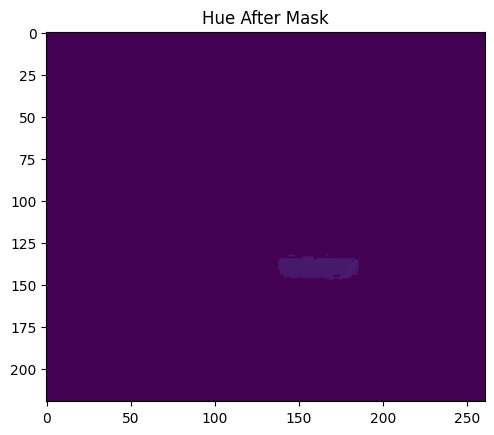

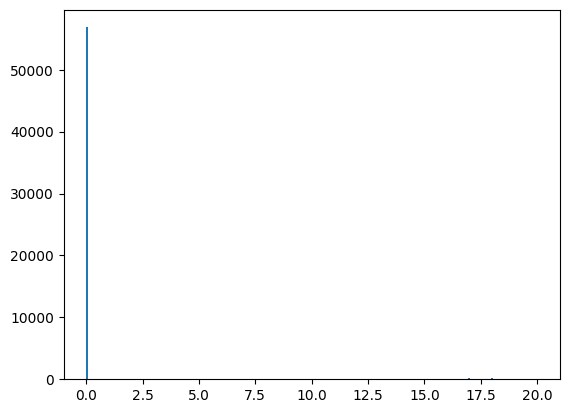

In [228]:
# Load image
path = "resources/lab_01/exercise_02/"

# Convert to HSI/HSV
imageHSV = cv2.cvtColor(imageRGB, cv2.COLOR_RGB2HSV)

# Define color range
colorMin = np.array([10,100,100])
colorMax = np.array([30,255,255])

# Segment only the selected color from the image and leave out all the rest (apply a mask)
mask = cv2.inRange(imageHSV, colorMin, colorMax)
masked = cv2.bitwise_and(imageRGB,imageRGB, mask=mask)
plotImage(masked, "Masked")
# Plot the masked image (where only the selected color is visible)

# Plot the original hue channel and its histogram
originalHSVHue = imageHSV[:,:,0]
plotImageAndHistogram(originalHSVHue, "Hue Original")
# Plot the masked hue channel and its histogram (the hue channel after applying the mask)
targetHSV = cv2.cvtColor(masked, cv2.COLOR_RGB2HSV)
targetHSVHue = targetHSV[:,:,0]
plotImageAndHistogram(targetHSVHue, "Hue After Mask")

<div style="background-color:#c2eafa"> 
    
### I.2.3 Cropping the licence plate
Now that you have extracted the plate location based on its color it is time to crop out the licence plate itself. 

The masking process converted all pixels that were outside of the color range, but the size of the image is still the same. Thus, you now need to find the maximal(and the minimal) x and y coordinates that contain useful color pixels.

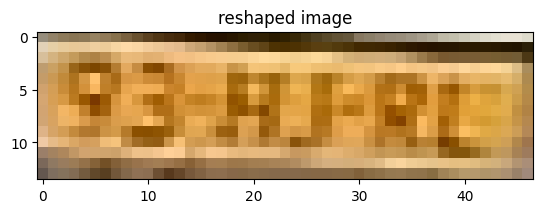

In [247]:
# Get coordinates of the plate

nonzero_indices = np.where(targetHSVHue > 0)


min_y = np.min(nonzero_indices[0])
max_y = np.max(nonzero_indices[0])
min_x = np.min(nonzero_indices[1])
max_x = np.max(nonzero_indices[1])

reshaped_image = imageRGB[min_y:max_y, min_x:max_x]
plotImage(reshaped_image,"Cropped image")
# Plot the cropped image

###  Questions section

<div style="background-color:#c2eafa"> 
<span style="font-size: 20px">❓</span> (type your answer in the yellow field below)

<i>
Write the most appropriate color range you determined, with a 1 sentence explanation of whether inspecting the histogram was successful and why

<div style="background-color:#f1be3e; padding:10px; color: white; border-radius: 10px" >

**Type your answer here.**
range was from 10 - 30 for the hue and 100 - 255 for teh saturation adn 100 - 255 for the value
I used color picker + trial and error, the histogram wasnt very clear for me, didnt see how to see values.
</div>

## PYTHON HANDS-ON Assignment I.3: Histogram comparison

<div style="background-color:#00A6D6; padding:10px; color: white; border-radius: 10px" >
<p style="font-size:25px">💬</p>
One of you colleagues comes to you with a hypothesis and wants to ask you about your opinion. 
He asks you if it is possible to differentiate between different characters from their histogram. He says, since every character on a plate has a distinct shape and color distribution, maybe this could be shown from the histograms. To help you investigate, he provides you with the plate and cropped characters from it.

</div>



**Completion requirements for this assignment:**
- [ ] Plot and compare the histograms of the cropped characters
- [ ] Compute euclidean distances
- [ ] Answer the hypothesis

<div style="background-color:#c2eafa"> 
    
### I.3.1 Histogram comparison
    
    
To verify his hypothesis, you execute the following experimental steps:
- Plot each character, convert to greyscale & copute then plot its histogram.
- Visually inspect if you see any differences between different character histograms.
- Compute the euclidean distance between the first character's histogram and all the rest. 
- Write in max 3 sentences your conclusion on whether it is possible to do such a distinction based on the histograms or not and why.

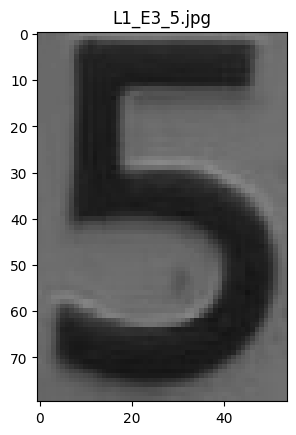

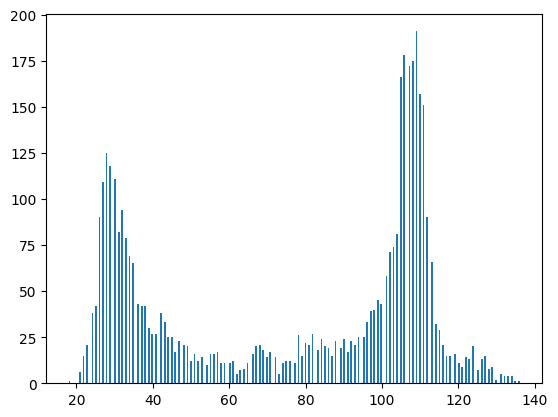

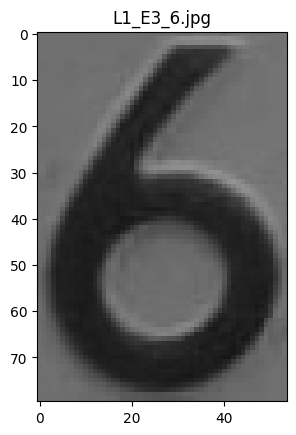

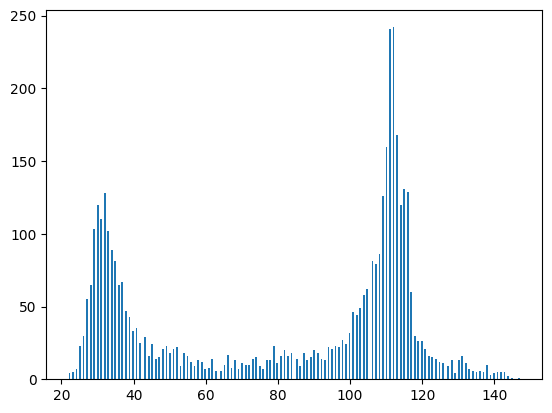

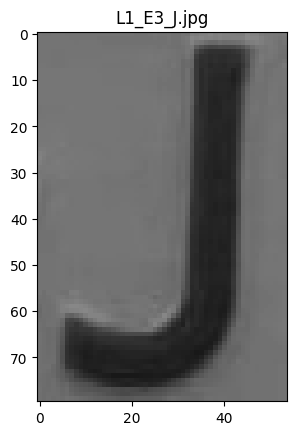

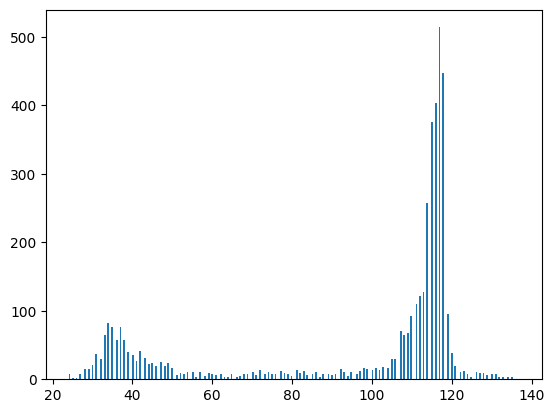

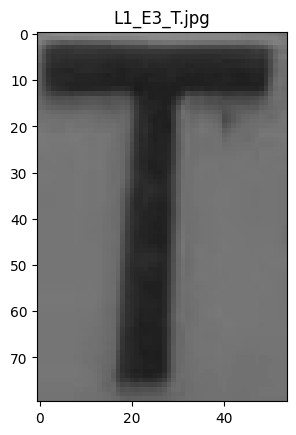

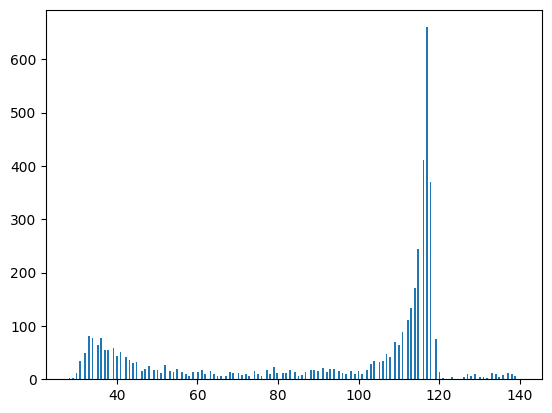

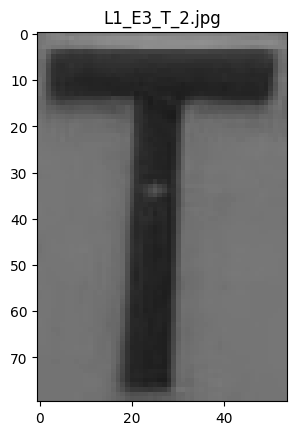

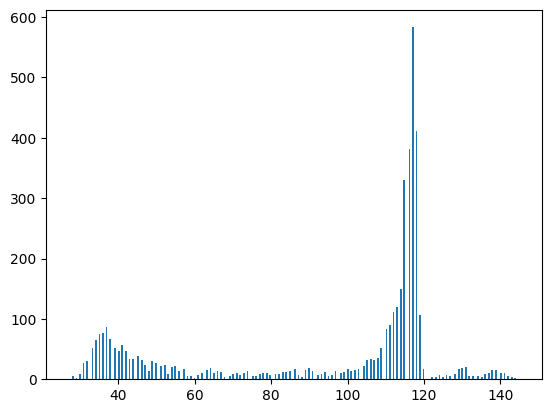

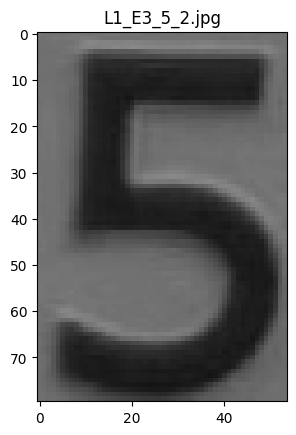

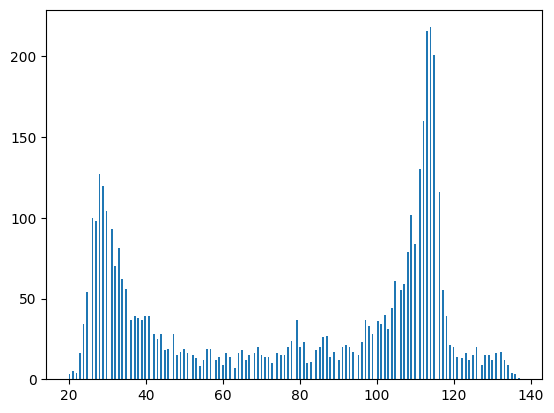

In [254]:
# Load images
path = "resources/lab_01/exercise_03/"

# Plot and compare all histograms
letters = ["L1_E3_5.jpg", "L1_E3_6.jpg", "L1_E3_J.jpg", "L1_E3_T.jpg", "L1_E3_T_2.jpg", "L1_E3_5_2.jpg"]
images = []
for letter in letters:
    image = cv2.imread(path + letter)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    images.append(image)

for i in range(len(images)):
    image = images[i]
    letter = letters[i]
    plotImageAndHistogram(image, letter, "gray")

In [259]:
# Create function to calculate euclidean distance between greyscale images' histogram (2d arrays)
# ! [img1] and [img2] must have the same shape
def euclideanDistance(img1, img2):
    hist1 = img1.flatten()
    hist2 = img2.flatten()
    distance = np.linalg.norm(hist1 - hist2)

    return distance
    
first, bins = np.histogram(images[0].flatten(), 256, [0, 255])

for i in range(1, len(images)):
    image = images[i]
    hist, bins = np.histogram(image.flatten(), 256, [0, 255])
    distance = euclideanDistance(first, hist)
    print(f'diatance : {distance}')
# Compute the eucledian distance between the first character and each of the others

diatance : 371.4754366038218
diatance : 964.8232998844918
diatance : 977.9693246723028
diatance : 964.6761114488116
diatance : 418.2391660282427


###  Questions section

<div style="background-color:#c2eafa">
<span style="font-size: 20px">❓</span> (type your answer in the yellow field below in max 3 sentences)

<i>
Is it possible to distinguish characters based on the histograms? Why or why not?

<div style="background-color:#f1be3e; padding:10px; color: white; border-radius: 10px" >

**Type your answer here.**
No it is not possbile. THe histogram only gives us a distribution of color, but if size changes there can be similar distribtuins without the same character. The histrogram does not take into account the order of the pixels.
</div>



<div style="background-color:#c2eafa">
<span style="font-size: 20px">❓</span> (type your answer in the yellow field below in max 3 sentences)

<i>
Is it possible to distinguish characters based on the euclidean distances of the histograms? Why or why not?

<div style="background-color:#f1be3e; padding:10px; color: white; border-radius: 10px" >

**Type your answer here.**
Again No, because if the histogram doesnt give us a ordering neither does the distance. The histogram distances show the difference in distribution, but cant rlly tell us a shape change more so than a color change. So we face the same problem.
</div>

⚠️__**Checklist before submitting**__

(try to fix anything that you can't tick from the checkboxes below)

In [261]:
# !pip install ipywidgets

import ipywidgets as widgets

check1 = widgets.Checkbox(              
    value=False,
    description='Filled in all of the yellow fields with answers to the questions marked with ❓',
    indent=False,
    layout={'width':'1000px'}
)
check2 = widgets.Checkbox(              
    value=False,
    description='Haven\'t used imports outside of those provided in the original notebook for this assignment',
    indent=False,
    layout={'width':'1000px'}
)
check3 = widgets.Checkbox(              
    value=False,
    description='All the code blocks can be run in sequence and execute successfully',
    indent=False,
    layout={'width':'1000px'}
)
check4 = widgets.Checkbox(              
    value=False,
    description='Haven\'t changed the layout or formatting in the notebook and have only written in the appropriate code cells or yellow areas',
    indent=False,
    layout={'width':'1000px'}
)
display(check1, check2, check3, check4)

Checkbox(value=False, description='Filled in all of the yellow fields with answers to the questions marked wit…

Checkbox(value=False, description="Haven't used imports outside of those provided in the original notebook for…

Checkbox(value=False, description='All the code blocks can be run in sequence and execute successfully', inden…

Checkbox(value=False, description="Haven't changed the layout or formatting in the notebook and have only writ…